In [40]:
class Node:
    def __init__(self, val=0):
        self.data = val
        self.val = val
        self.next = val
        self.random = None
    
    def size(self):
        temp = self
        count = 0
        while temp:
            count += 1
            temp = temp.next
        return count
    
    def print(self):
        print(self.data)
    
    def __str__(self):
        s = ""
        temp = self
        while temp:
            s += str(temp.val) + '->'
            temp = temp.next
        s += 'None'
        return s
    
    def __repr__(self):
        return self.__str__()
    
def convert(lis=list(range(10))):
    lis = list(lis)
    nodes = [Node(i) for i in lis] + [None]
    for i in range(len(lis)):
        nodes[i].next = nodes[i+1]
    return nodes[0]

print(convert())

0->1->2->3->4->5->6->7->8->9->None


### Nth node from Last

In [41]:
root = convert()
root.print()

def solve(head,n):
    first = sec = head
    count = 0
    while sec:
        if count >= n:
            first = first.next
        sec = sec.next
        count += 1
    
    if count < n: return -1
    return first.data


print(solve(root, 2))

0
8


### Reverse K Group Nodes alternatively

In [42]:
root = convert()
print(root)

def solve(root, k, flag=True):
    # base case
    if root is None or root.next is None: return root
    
    # chopping the required LL
    last = head = root
    count = 0
    while last:
        count += 1
        if count == k: break
        last = last.next
    
    nhead = last.next if last else None
    if last: last.next = None
    
    # if to reverse or not
    if flag:
        prev = nex = None
        cur = root

        while cur:
            nex = cur.next
            cur.next = prev
            prev = cur
            cur = nex
        
        # set head and prev
        head.next = solve(nhead, k, not flag)
        return prev
        
    else:
        # simlply return set last and return head 
        if last: last.next = solve(nhead, k, not flag)
        return head

print(solve(root, 2))

0->1->2->3->4->5->6->7->8->9->None
1->0->2->3->5->4->6->7->9->8->None


### Rotate a linked list

The given k should be smaller than length.

In [43]:
root = convert()
print(root)

def solve(root, k):
    if k == 0: return root
    count = 0
    temp = head = root
    while temp:
        count += 1
        if count >= k: break
        temp = temp.next   
    
    if not temp: return None
    
    nhead = temp.next
    temp.next = None
    
    temp2 = nhead
    while temp2.next:
        temp2 = temp2.next
    
    temp2.next = head
    return nhead

for i in range(root.size()):
    print(i, solve(convert(), i))

0->1->2->3->4->5->6->7->8->9->None
0 0->1->2->3->4->5->6->7->8->9->None
1 1->2->3->4->5->6->7->8->9->0->None
2 2->3->4->5->6->7->8->9->0->1->None
3 3->4->5->6->7->8->9->0->1->2->None
4 4->5->6->7->8->9->0->1->2->3->None
5 5->6->7->8->9->0->1->2->3->4->None
6 6->7->8->9->0->1->2->3->4->5->None
7 7->8->9->0->1->2->3->4->5->6->None
8 8->9->0->1->2->3->4->5->6->7->None
9 9->0->1->2->3->4->5->6->7->8->None


### Delete middle Node
Delete right mid.

The idea is to get node before right mid, and to get that stop one iteration before by checking fast.next.next

In [44]:
root = convert()
print(root)

def solve(root):
    dummy = Node(0)
    dummy.next = root
    slow = fast = dummy
    
    while fast and fast.next and fast.next.next:
        slow = slow.next
        fast = fast.next.next
    
    mid = slow.next
    arc = mid.next
    mid.next = None
    slow.next = arc
    
    return dummy.next

print(solve(root))

0->1->2->3->4->5->6->7->8->9->None
0->1->2->3->4->6->7->8->9->None


### Left and Right mid

In [45]:
def left_mid(root):
    dummy = Node(0)
    dummy.next = root
    slow = fast = dummy
    
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
    slow.print()

def right_mid(root):
    dummy = Node(0)
    dummy.next = root
    slow = fast = dummy
    
    while fast:
        slow = slow.next
        if fast.next:fast = fast.next.next
        else: break
    slow.print()

root = convert(range(0, 12))
print(root)
left_mid(root)
right_mid(root)

root = convert(range(1, 12))
print(root)
left_mid(root)
right_mid(root)

0->1->2->3->4->5->6->7->8->9->10->11->None
5
6
1->2->3->4->5->6->7->8->9->10->11->None
6
6


### Detect loop

In [46]:
root = convert()

def solve(head):
    slow = fast = head
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
        if slow == fast: return True

    return False

print(solve(root))

False


### Remove loop

In [47]:
 def solve(head):
    d = set()
    temp = head
    prev = head
    while temp:
        if temp not in d:
            d.add(temp)
            prev = temp
            temp = temp.next
        else:
            prev.next = None
            return head

    return head

In [39]:
# merge k LL
# interleaving LL
# back to front ll

### Random pointer Clonning

In [55]:
def solve(head):
    if head is None: return None
    d = dict()
    temp = head
    while temp:
        d[temp] = Node(temp.val)
        temp = temp.next

    dummy = Node(0)

    temp = head
    while temp:
        if temp.next:
            d[temp].next = d[temp.next]
        if temp.random:
            d[temp].random = d[temp.random]

        temp = temp.next

    return d[head]

root = convert()
print(root)

0->1->2->3->4->5->6->7->8->9->None


### Random Pointer with *O(N)* TC and *O(1)* SC

To temporarily store the connnections of clone Nodes we make a 'N' space connection with them.  
Using this we can make random pointer connections.  
Then restore the correct connection.  

In [57]:
def solve(head):
    if not head: return head
    
    # create N connection with new clone Nodes
    temp = head
    while temp:
        nex = temp.next
        dtemp = Node(temp.val)
        temp.next = dtemp
        dtemp.next = nex
        temp = nex

    # set random pointer connection of clone Nodes
    temp = head
    while temp:
        rtemp = temp.random
        if rtemp:
            drtemp = rtemp.next
            dtemp = temp.next
            dtemp.random = drtemp
        else:
            dtemp.random = None

        temp = temp.next.next

    # restore next pointers of both LL
    temp = head
    store = head.next
    while temp:
        dtemp = temp.next
        nex = dtemp.next
        if nex:
            dnex = nex.next

            temp.next = nex
            dtemp.next = dnex
        else:
            dtemp.next = None

        temp = nex

    return store

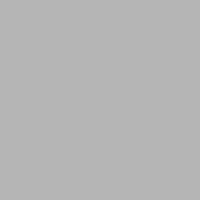

In [94]:
# set background
from PIL import *
from PIL import ImageFont

size = (200, 200)
color = (180, 180, 180)
image = Image.new('RGBA', size, color)
image

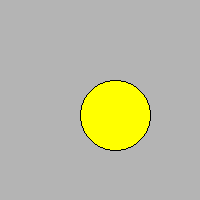

In [95]:
# draw elipse 
x1, y1, x2, y2 = 80, 80, 150, 150
coords = (x1, y1, x2, y2)
draw = ImageDraw.Draw(image)
draw.ellipse(coords, fill='yellow', outline='black')
image

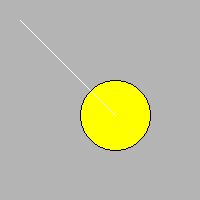

In [96]:
# draw line
point1, point2 = (20, 20), (115, 115)
draw.line((*point1, *point2), fill='white', width=0)
image

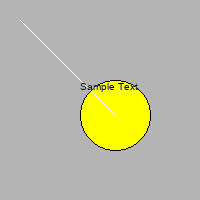

In [100]:
# write fonts
font = ImageFont.truetype("arial", 10)
draw.text((80, 80),"Sample Text",fill='black',font=font)
image

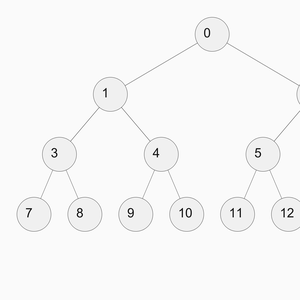

In [105]:
from treeVisuals import *

root = make(range(15))
d = DrawTree(root)
d.drawTree()